In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv("CO22339_dataset_carsales.csv")
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 1].values

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X = dataset.copy()
labelencoder_X = LabelEncoder()
# Access the 'Model' column using its name instead of numerical index
X['Model'] = labelencoder_X.fit_transform(X['Model'])

In [5]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Update OneHotEncoder initialization

# Alternatively, using sklearn OneHotEncoder
encoder = OneHotEncoder()
encoded_model = encoder.fit_transform(dataset[['Model']])
# Convert the sparse matrix to a dense array
encoded_model_dense = encoded_model.toarray()

# Convert to DataFrame and merge back
model_columns = encoder.get_feature_names_out(['Model'])

# Create the DataFrame using the dense array
df_encoded = pd.DataFrame(encoded_model_dense, columns=model_columns)

# Drop original 'Model' column and concatenate
dataset = dataset.drop(columns=['Model'], errors='ignore')
dataset = pd.concat([dataset, df_encoded], axis=1)

In [7]:
X = dataset.drop(columns=['Price'], errors='ignore')
Y = dataset['Price']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 1/3, random_state= 0)

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
# Predicting the Test set results
y_pred= regressor.predict(X_test)

In [10]:
# Calculate error on the Test set
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_pred)

9479904150956.69

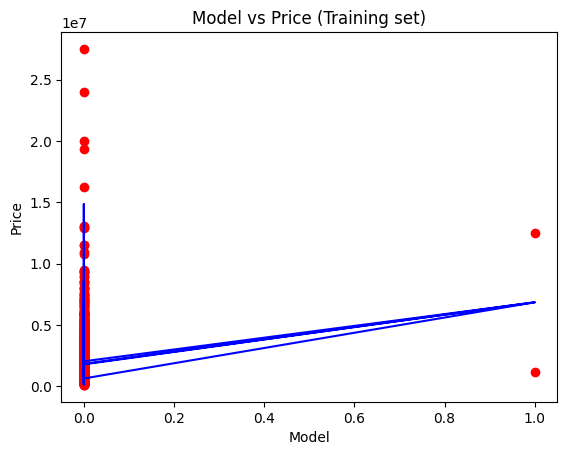

In [11]:
# Visualising the Training set results
plt.scatter(X_train.iloc[:, 0], Y_train, color= 'red')
plt.plot(X_train.iloc[:, 0], regressor.predict(X_train), color= 'blue')
plt.title('Model vs Price (Training set)')
plt.xlabel('Model')
plt.ylabel('Price')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

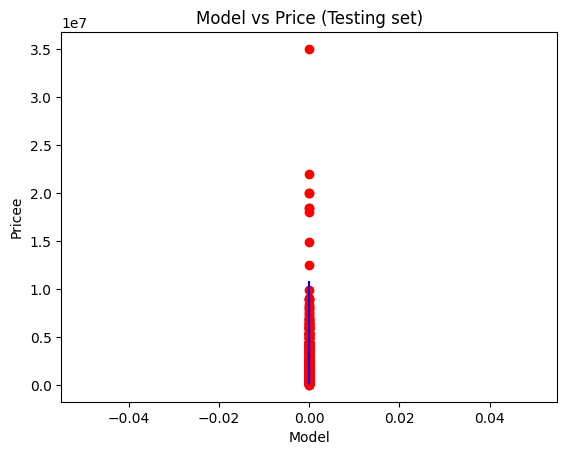

In [12]:
# Visualising the Training set results
plt.scatter(X_test.iloc[:, 0], Y_test, color= 'red')
plt.plot(X_test.iloc[:, 0], regressor.predict(X_test), color= 'blue')
plt.title('Model vs Price (Testing set)')
plt.xlabel('Model')
plt.ylabel('Pricee')
plt.show